In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

#import plotly.express as px
#import plotly.graph_objects as go

- **First we will start by loading the job listing that was scrapped from indeed and career jet.**

In [2]:
df =pd.read_csv('joblisting_df.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,title,company,location,job_desc,date_posted,date_scrapped,salary,job_url
0,0,0,AWS Data Science Architect (QlikView & QlikSen...,iSanqa Resourcing,"Midrand, Johannesburg",AWS Data Science Architect (QlikView & QlikSen...,None,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zae5921d3d4a...
1,1,1,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,2 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zadbe4ba70e8...
2,2,2,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-THa-2* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zae0c9b80b17...
3,3,3,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-RMo-1* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zab3ed08a036...
4,4,4,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,3 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/za589075d2ad...


Looking at the DF, we can see that we need prepare the Data. 

We are going to this by:

1. - Putting all of your data together and randomizing it. This ensures that data is distributed evenly and that the ordering does not interfere with the learning process.
2. - Cleaning the data to remove unnecessary information, missing values, rows and columns, duplicate values, data type conversion, and so on. It is possible that you will need to restructure the dataset and change the rows and columns or the index of rows and columns.
3. - Visualize the data to understand how it is organized and the relationships between the various variables and classes that are present.

In [3]:
#deleting two unnecesaary columns
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace= True, axis = 1)
df.head()

,title,company,location,job_desc,date_posted,date_scrapped,salary,job_url
0,AWS Data Science Architect (QlikView & QlikSen...,iSanqa Resourcing,"Midrand, Johannesburg",AWS Data Science Architect (QlikView & QlikSen...,None,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zae5921d3d4a...
1,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,2 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zadbe4ba70e8...
2,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-THa-2* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zae0c9b80b17...
3,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-RMo-1* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zab3ed08a036...
4,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,3 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/za589075d2ad...


In [3]:
# randomizing the dataset
#df = df.sample(n=6315,replace=True)


**The company name appears to be improperly scrapped as some retuns html code. We need to clean this by creating a function that return the campnay name**

In [7]:
df.iloc[:]['company']

0       <a class="turnstileLink companyOverviewLink" d...
1       <a class="turnstileLink companyOverviewLink" d...
2       <a class="turnstileLink companyOverviewLink" d...
3       <a class="turnstileLink companyOverviewLink" d...
4                                              IHS Markit
                              ...                        
6310                                         Wurzel Group
6311                              Communicate Recruitment
6312    <a class="turnstileLink companyOverviewLink" d...
6313    <a class="turnstileLink companyOverviewLink" d...
6314                                         Capitec Bank
Name: company, Length: 6315, dtype: object

In [ ]:
# code to remove html links
company = soup.find('td', class_ ='resultContent')
        company_ = company.find('div', class_ = 'heading6 company_location tapItem-gutter companyInfo')
        co_name = company_.find('span').text.strip()


In [26]:
# get insights for top 10 hiring companies
#plt.figure(figsize =(10,6))
data = pd.DataFrame(df.groupby('company').count(), )['title'].sort_values(ascending= False)[:10]
data

company
Communicate Recruitment                                                                                                                                           546
e-Merge IT Recruitment                                                                                                                                            408
<a class="turnstileLink companyOverviewLink" data-tn-element="companyName" href="/cmp/Firstrand" rel="noopener" target="_blank">FirstRand</a>                     280
iSanqa Resourcing                                                                                                                                                 204
University of Johannesburg                                                                                                                                        204
Valenture Institute                                                                                                                                               

The location includes both the city and the province. We need to design new features to represent the city and province.

In [8]:
df['location']

0                  Johannesburg, Gauteng
1                  Johannesburg, Gauteng
2                Cape Town, Western Cape
3             Johannesburg, Gauteng 2191
4                Cape Town, Western Cape
                      ...               
6310     Remote in Durban, KwaZulu-Natal
6311               Johannesburg, Gauteng
6312               Johannesburg, Gauteng
6313    Johannesburg, Gauteng+1 location
6314          Stellenbosch, Western Cape
Name: location, Length: 6315, dtype: object

In [18]:
#creating new features for city and province

df['city'] = df["location"].apply(lambda x: x.split(","))
df['city'] = df['city'].apply(lambda x: " ".join(x[0].split()[0:]))
df['province']= df['location'].apply(lambda x: " ".join(x.split()[-1:]))


In [19]:
df.head()

,title,company,location,job_desc,date_posted,date_scrapped,salary,job_url,city,province
0,AWS Data Science Architect (QlikView & QlikSen...,iSanqa Resourcing,"Midrand, Johannesburg",AWS Data Science Architect (QlikView & QlikSen...,None,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zae5921d3d4a...,Midrand,Johannesburg
1,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,2 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zadbe4ba70e8...,Johannesburg,Gauteng
2,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-THa-2* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zae0c9b80b17...,Johannesburg,Gauteng
3,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-RMo-1* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zab3ed08a036...,Johannesburg,Gauteng
4,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,3 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/za589075d2ad...,Johannesburg,Gauteng


In [37]:
#clean province of numbers

In [ ]:
#remove cities in the province

In [28]:
#visualize the top hiring province and city
pd.DataFrame(df.groupby('province').count(), )['title'].sort_values(ascending= False)[:10]


province
Gauteng          3463
Cape             1245
Africa            383
Johannesburg      368
KwaZulu-Natal     202
Town              190
Remote            166
West              145
location           67
0003                9
Name: title, dtype: int64

Find the skills and tools that are most used in data science

In [53]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


In [122]:
new_list = []
stop_words = stopwords.words('english')


for row in df.iterrows():
    print(row[1]['job_desc'])
    #for word in tok:
        #if word.lower() not in stop_words:
            #new_list.append(word)
print(tok)

Provide data insights and conduct detailed analysis on data to support strategic decision making.Proficiency in working with Python, SAS or R / Scala for data…
Create test data i.e. create new profiles, create batch files, etc.All appointments will be made in line with the Bank’s Employment Equity plan The Bank…
Able to challenge client hypotheses and solutions with robust data.A proven record in analysing data and effectively presenting to clients to support proposed…
Play the role of data scientist for the design teams, ensuring our data usage in apps is relevant to the end-users.Advocating for good product habits.
Company & Team – “About Us”   Agri at IHS Markit is modernizing its analytics infrastructure. We are developing automated data collection, migrating our data and operations to the …
I am representing a reputable insurance giant who is looking for Data Science Manager to lead their team. The ideal candidate has experience in machine learning and has a math’s re…
Collaborate

Anglo American / De Beers Group collects and processes personal data in accordance with the relevant regulations.Start and stop equipment where required.
Company & Team – “About Us”   Agri at IHS Markit is modernizing its analytics infrastructure. We are developing automated data collection, migrating our data and operations to the …
Junior Global Property Analyst   Our client believes the appointment of a Junior Research Analyst with appropriate experience and qualifications will allow it to support the future…
Data wrangling and data preparation.Analysis, reporting, data visualisation and communicating results.Manage the credit risk modelling team.
Identification of data trends or patterns, data mining and warehousing.Managing the analysis of data files in various layouts and performing data auditing and…
Position Summary   Industry: Education & Training  Job category: Education and Training  Campus: Auckland Park Kingsway Campus  Contract: Permanent  Remuneration: Market Related  E…

Anglo American / De Beers Group collects and processes personal data in accordance with the relevant regulations.Start and stop equipment where required.
This role will provide Data Quality oversight in the form of data error detection, correction and prevention.   The Data  Analyst will monitor data collected, stored, transformed a…
You will be involved in delivering projects to clients from information gathering, working with a team in designing solutions, solution configuration, system testing, user training…
AWS Data Science Architect (QlikView & QlikSense) (Contract) - Midrand/Menlyn/Rosslyn/Home Office rotation - ISB3902031   About the job AWS Data Science Architect (QlikView & QlikS…
*Reference: CPM008305-THa-2*   Our client in financial services is seeking a Data Science Manager to join their fast paces and ever growing team!  *Qualifications*    BSc/ BSc hono…
Using pre-written or customised programs to correct data if required.This also requires data fix documentation to be c

Supports business stakeholders in helping them achieve insights into the data.In addition the analyst is also responsible in providing assistance and support…
Provide data insights and conduct detailed analysis on data to support strategic decision making.Proficiency in working with Python, SAS or R / Scala for data…
Requisition Details & Talent Acquisition Contact   REQ 116863- Tshego Semenya   Career Stream   Quantitative   Leadership Pipeline   Manage Self: Professional   Position   Senior Q…
Conduct data analysis and data profiling.Transform business requirements into Star Schema data models.Provide support to the development team members and…
Experience in development of data intensive applications across the web;Five to seven years’ experience in IT development at an analyst level;
The Service Desk provides end-users with the ability to log tickets and requests, acting as a single point of contact for all Applications, Infrastructure and…
Data mining and data modelling.Concepts s

SQL database skills, PowerBi Reporting, data research & analysis.Develop new systems in collaboration with the IT Department to ensure a data-availability.
Check integrity of data/information received.Gather/collate information from various sources.Prepare professional presentations in a timely manner.
Company Description   About Deloitte:   Deloitte is a leading global provider of audit and assurance, consulting, financial advisory, risk advisory, tax and related services. Our g…
Anglo American / De Beers Group collects and processes personal data in accordance with the relevant regulations.Start and stop equipment where required.
Our ideal candidate for this role is an experienced data analyst and researcher who is able to prepare and maintain data for analysis as well as visualising…
Definition and preparation of test data.The Tester will be responsible for developing User acceptance testing (UAT) test scripts, ensuring traceability of…
Practical experience in data modelling, data w

Parvana Strategic Sourcing has established itself as a leading provider of permanent and temporary recruitment services to the South African, European and UK marketplace. In additi…
Works as the demand analyst to collect data, define problems, establish facts and reports, and draw valid conclusions.An applicable bachelor’s degree.
Position Summary   Industry: Education & Training  Job category: Education and Training  Campus: Auckland Park Kingsway Campus  Contract: Permanent  Remuneration: Market Related  E…
AWS Data Science Architect (Contract) Midrand/Menlyn/Rosslyn/Home Office rotation - ISB2102000   About the job AWS Data Science Architect (Contract) Midrand/Menlyn/Rosslyn/Home Off…
Parvana Strategic Sourcing has established itself as a leading provider of permanent and temporary recruitment services to the South African, European and UK marketplace. In additi…
Lead analyst on a project from project inception to delivery.We are looking for a self-starting Business Analyst to suppo

The Senior Teacher role is primarily responsible for ensuring that the teachers in their subject area deliver high-quality educational experiences. While this role is not a people-…
To improve efficiency, reduce waste, identify and implement solutions, meet project deadlines and accurately document the necessary requirements to be done in…
*Reference: CPM008305-RMo-1*   Our client in financial services is seeking a Data Science Manager to join their fast paces and ever growing team!  *Qualifications*    BSc/ BSc hono…
Validate system information and data integrity.Propose improvements based on data analysis.Extract and analyse required data for board packs.
Description   This is a great opportunity for a suitably qualified and experienced Digital Data Analyst who wants to flex their muscles on some of the most established brands in So…
Our international manufacturing client with head offices based in the Midrand area is on the hunt for an exceptional AWS Data Science Architect to join 

*Reference: CPM008305-RMo-1*   Our client in financial services is seeking a Data Science Manager to join their fast paces and ever growing team!  *Qualifications*    BSc/ BSc hono…
Company Description   About Deloitte:   Deloitte is a leading global provider of audit and assurance, consulting, financial advisory, risk advisory, tax and related services. Our g…
*Reference: CPM008305-RMo-1*   Our client in financial services is seeking a Data Science Manager to join their fast paces and ever growing team!  *Qualifications*    BSc/ BSc hono…
Experience in central monitoring and clinical data review is a plus.Generate, follow up and resolves data queries and site issues.
Draw data from systems and do analysis on information retrieved.The successful candidate will be responsible for Data Extraction and Analysis, and Reporting…
Data wrangling and data preparation.Analysis, reporting, data visualisation and communicating results.Manage the credit risk modelling team.
*Ref: TJ 405099 - SENIOR

Draw data from systems and do analysis on information retrieved.The successful candidate will be responsible for Data Extraction and Analysis, and Reporting…
*Reference: CPM008305-THa-2*   Our client in financial services is seeking a Data Science Manager to join their fast paces and ever growing team!  *Qualifications*    BSc/ BSc hono…
Our international manufacturing client with head offices based in the Midrand area is on the hunt for an exceptional AWS Data Science Architect to join their dynamic team.   In thi…
This role will provide Data Quality oversight in the form of data error detection, correction and prevention.   The Data  Analyst will monitor data collected, stored, transformed a…
An awesome opportunity is available for a Business Intelligence Developer to work for a German multinational corporate company that manufacturers luxury vehicles and motorcycles.  …
The Teacher role is primarily responsible for working alongside the Senior Teacher to motivate, inspire and empowe

Gather and manipulate various data analyses.Up to $2500 USD/per month*.You will be responsible for thoroughly understanding our technology and financial…
You will solve problems using data and machine learning techniques within various industries.You will be responsible for creating mathematical and statistical…
Must be based in the Western Cape or JHB.Degree or Diploma with 4 to 5 years related experience or qualified by experience.Experienced in Coral Video Studio.
We are looking for Course Creators for the following subjects and grades: Machine Learning: Grade 11- 12 Robotics: Grade 11- 12 Data Science: Garde 11 -12…
I am representing a reputable insurance giant who is looking for Data Science Manager to lead their team. The ideal candidate has experience in machine learning and has a math’s re…
Qualifications   BSc/ BSc honours: Computational/ Applied Mathematics/ Statistics    Tools   Python  SQL  PowerBI  AWS  SAS    Description   Stakeholder engagement and expectation …
Qualific

What We'll Bring: At TransUnion, we have a welcoming and energetic environment that encourages collaboration and innovation we're consistently exploring new technologies and tools …
The Senior Teacher role is primarily responsible for ensuring that the teachers in their subject area deliver high-quality educational experiences. While this role is not a people-…
Mentor solution architect / senior developers / designers / business analysts.5+ years Experience in high volume data and files processing, in a batch and real…
Identification of data trends or patterns, data mining and warehousing.Managing the analysis of data files in various layouts and performing data auditing and…
*Reference: CPM008305-RMo-1*   Our client in financial services is seeking a Data Science Manager to join their fast paces and ever growing team!  *Qualifications*    BSc/ BSc hono…
You will be responsible for Identify valuable data sources and automate collection, loading and transforming processes.Min 3 years Da

Provides assistance and training to other education analysts in this area as required.Uses data from a variety of sources to analyze needs and designs…
Description   This is a great opportunity for a suitably qualified and experienced Digital Data Analyst who wants to flex their muscles on some of the most established brands in So…
This role will provide Data Quality oversight in the form of data error detection, correction and prevention.   The Data  Analyst will monitor data collected, stored, transformed a…
Assess the effectiveness of data sources and data-gathering techniques to improve data collection methods.Perform data preparation in order to reduce and shape…
*Reference: JHB000054-Njay-1*   *An exciting opportunity for an enthusiastic Quant Analyst exists for our client, a South African-based asset management business. That offers a ran…
Liaise with and collaborate with data analysts, data warehousing.Developing ETL processes that convert data into formats through a team of da

In [61]:
from collections import Counter

In [63]:
counter_words = Counter(new_list)

In [66]:
#counter_words.most_common(100)

Since we are interested in jobs for students existing Explore we need to make feature that show this. We will create features for remote jobs and entry-level jobs.

In [20]:
df['remote'] = df['job_desc'].str.contains('remote' or 'work from home', case=False, regex=False)
#df['entry_level'] = df['title'].str.contains('Junior|graduate|entry|internship|beginner|candidate|contract', case=False, regex=False)


In [ ]:
#visualize the number of remote jobs

In [22]:
#entry level jobs
searchfor = ['junior','graduate', 'entry', 'internship', 'beginner', 'candidate', 'contract']
df["entry"] = df['title'].apply(lambda x: True if any(i in x.lower() for i in searchfor) else False)


In [24]:
df.head()

,title,company,location,job_desc,date_posted,date_scrapped,salary,job_url,city,province,remote,entry
0,AWS Data Science Architect (QlikView & QlikSen...,iSanqa Resourcing,"Midrand, Johannesburg",AWS Data Science Architect (QlikView & QlikSen...,None,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zae5921d3d4a...,Midrand,Johannesburg,False,True
1,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,2 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zadbe4ba70e8...,Johannesburg,Gauteng,False,False
2,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-THa-2* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zae0c9b80b17...,Johannesburg,Gauteng,False,False
3,Data science manager,Communicate Recruitment,"Johannesburg, Gauteng",*Reference: CPM008305-RMo-1* Our client in f...,3 days ago,2022-05-08,"R620,000-700,000 per year",https://www.careerjet.co.za/jobad/zab3ed08a036...,Johannesburg,Gauteng,False,False
4,Business Intelligence Developer (with Cloud an...,e-Merge IT Recruitment,"Johannesburg, Gauteng",An awesome opportunity is available for a Busi...,3 days ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/za589075d2ad...,Johannesburg,Gauteng,False,False


In [23]:
#visualize
df['entry'].value_counts()

False    5396
True      919
Name: entry, dtype: int64

In [120]:
df.iloc[3:5]

,title,company,location,job_desc,date_posted,date_scrapped,salary,job_url,city,province,remote,Junior,entry_level,entry
3,Junior Product Strategist,"<a class=""turnstileLink companyOverviewLink"" d...","Johannesburg, Gauteng 2191",Play the role of data scientist for the design...,Posted12 days ago,2022-05-09,NaN,https://www.indeed.com/rc/clk?jk=a8f0402286201...,Johannesburg,Gauteng 2191,False,True,False,True
4,"2022 Graduate - Data Science Associate, Agribu...",IHS Markit,"Cape Town, Western Cape",Company & Team – “About Us” Agri at IHS Mark...,2 months ago,2022-05-08,NaN,https://www.careerjet.co.za/jobad/zaa098bcd8b4...,Cape Town,Western Cape,False,False,False,True


In [ ]:
skills = ['R', 'Python', 'CSS', 'Developer','reporting', 'PowerBI', 'Visualization', 'AWS', 'Azure', 'SAS', 'Excel', ]

In [35]:
#df['province'].apply(lambda x: x[-1].split()[:])
df['province'].apply(lambda x: " ".join(x[-1].split()[:]))



0                  Gauteng
1                  Gauteng
2             Western Cape
3             Gauteng 2191
4             Western Cape
               ...        
6310         KwaZulu-Natal
6311               Gauteng
6312               Gauteng
6313    Gauteng+1 location
6314          Western Cape
Name: province, Length: 6315, dtype: object

In [ ]:
re.search(r"\[(\w+)\]", s)

<AxesSubplot:xlabel='company'>

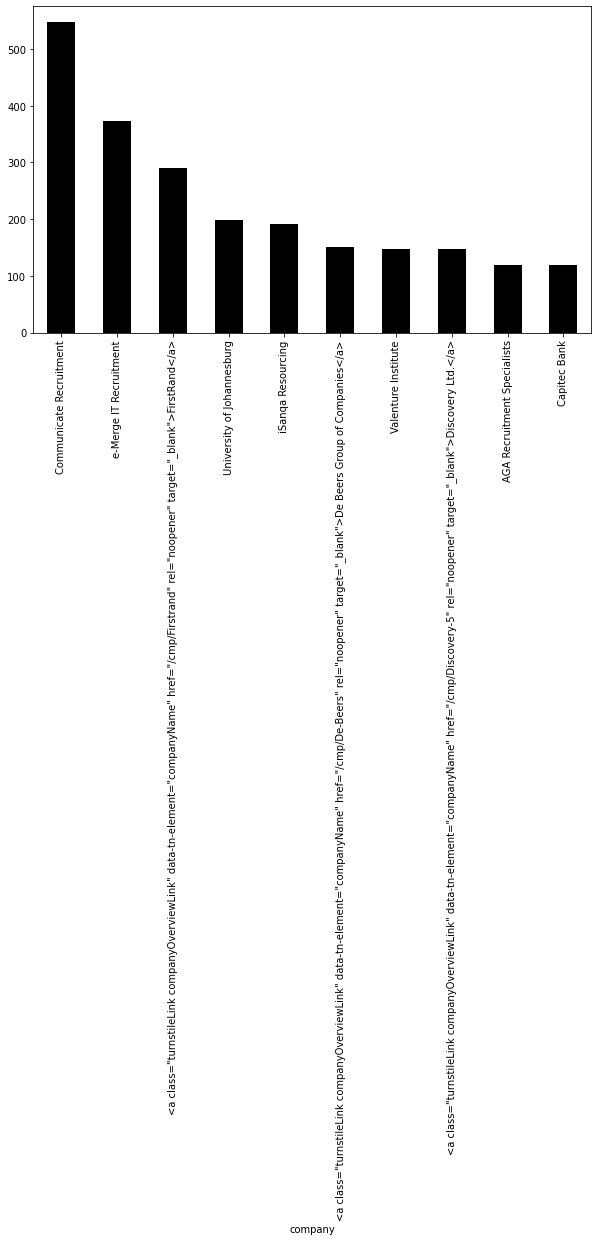

In [43]:
plt.figure(figsize =(10,6))
pd.DataFrame(df.groupby('company').count(), )['title'].sort_values(ascending= False)[:10].plot(kind ='bar', color = 'black')


In [ ]:
df['title'][:60]

In [ ]:
plt.figure(figsize =(10,6))
pd.DataFrame(df.groupby('company').count(), )['title'].sort_values(ascending= False)[:10].plot(kind ='bar', color = 'green')


In [ ]:
#location with the highest listings

plt.figure(figsize =(10,6))
pd.DataFrame(df.groupby('location').count(), )['title'].sort_values(ascending= False)[:10].plot(kind ='bar', color = 'orange')
